<a href="https://colab.research.google.com/github/prashanthgedde/Coursera-IntroToTF/blob/main/Week2_Callback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Callback - stopping learning when the required metrics are met

In [1]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


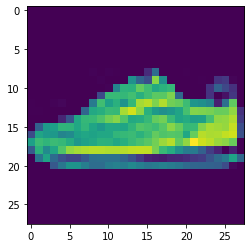

In [5]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[52])

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [32]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [34]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True


callback = myCallback()
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20, callbacks=[callback])

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2655 - accuracy: 0.9015

Reached 90% accuracy so cancelling training!
